<p>&nbsp;</p>
</p><h1 style="text-align: center;"><strong>Detec&ccedil;&atilde;o automatizada de Fake News</strong></h1>
<h1 style="text-align: center;"><strong>e o problema da linguagem ofensiva</strong></h1>
<h1 style="text-align: center;"><strong>e &oacute;dio</strong></h1>
<p>&nbsp;</p><p>&nbsp;</p>

</p><h4 style="text-align: center;"><strong>Proposta de Tema para Trabalho de Conclusão do Curso de Especialização em Ciência de Dados.</strong></h4>

</p><h3 style="text-align: center;"><strong>Faculdade de Engenharia de Sorocaba</strong></h3>

Proposto por:

Alex Cozer Abrantes RA:183150

Bruno Alves Comitre RA:183141

***

# Glossário

<ul>
    <li><a href='#analise_exploratoria'>1. Análise Explorátoria</a></li>
    <ul>
        <li><a href='#imports'>1.1 Imports</a></li>
        <li><a href='#leitura_dataset'>1.2 Leitura do Dataset</a></li>
        <li><a href='#classificacao_features'>1.3 Classificação das Features</a></li>
        <li><a href='#dicionario_dados'>1.4 Dicionário dos Dados</a></li>
        <li><a href='#analise_dados'>1.5 Análise dos Dados</a></li>
        <li><a href='#dados_faltantes'>1.6 Dados Faltantes</a></li>
        <li><a href='#dados_desiquilibrados'>1.7 Dados Desiquilibrados e Random Shuffle</a></li>
        <li><a href='#novas_features'>1.8 Novas Features</a></li>
        <li><a href='#analise_grafica'>1.9 Análise Gráfica</a></li>
        <ul>
            <li><a href='#wordcloud'>1.9.1 WordCloud</a></li>
            <li><a href='#histograma'>1.9.2 Histograma</a></li>
            <ul>
                <li><a href='#histo_titulo'>1.9.2.1 Histograma dos Títulos</a></li>
                <li><a href='#histo_texto'>1.9.2.2 Histograma dos Textos</a></li>
            </ul>
            <li><a href='#boxplot'>1.9.3 Diagrama de Caixa</a></li>
            <ul>
                <li><a href='#boxplot_titulo'>1.9.3.1 Diagrama de Caixa dos Títulos</a></li>
                <li><a href='#boxplot_texto'>1.9.3.2 Diagrama de Caixa dos Textos</a></li>
            </ul>
            <li><a href='#analise_palavras'>1.9.4 Análise por Palavras</a></li>
            <ul>
                <li><a href='#recursos_palavras'>1.9.4.1 Recursos por palavras</a></li>
                <li><a href='#classe_gramatical'>1.9.4.2 Classe Gramatical</a></li>                
            </ul>
            <li><a href='#matriz_correlacao'>1.9.5 Matriz de correlação</a></li>
        </ul>
    </ul>
</ul>

<a id='analise_exploratoria'></a>
# 1. Análise Explorátoria:

Nesta fase do trabalho, inicialmente, faz necessário a aplicação de técnicas para manusear valores faltantes e fazer transformações de variáveis. Os dados serão ajustados e estreitando os presupostos para empregar técnicas gráficas e quantitativas, visando maximizar a obtenção de informações, tendências e detectação decomportamentos.

<a id='imports'></a>
## 1.1 Imports

In [116]:
!pip install names

import numpy as np
import pandas as pd
import csv
import random 
import pandas_profiling #conda install -c conda-forge pandas-profiling
import names #pip install names
import nltk
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.io.json import json_normalize
from plotly import tools
from tqdm import tqdm


nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<a id='leitura_dataset'></a>
## 1.2 Leitura do Dataset

In [117]:
# Train Dataset
## arquivo disponivel em: https://drive.google.com/drive/folders/1LqNzxY8l0EgznlCD-g873VD-ys1BRN2-?fbclid=IwAR3PPLu4hgNdKfQDJzrLGwV6L42Vm3xBrrcquuCOR4ySS97bVvU46JDaR2s
train_data = pd.read_csv('../input/train.csv')
train_data = train_data.sample(frac = 1) # Randomly Smaple data, ratio is 100%
train_data.head()

,id,title,author,text,label
19369,19369,Новая Зеландия заявила о приостановке работы н...,RT на русском,"27 октября 2016, 07:10 Новая Зеландия приостан...",1
8003,8003,"Arthur Hiller, ‘Love Story’ Director and Box-O...",Dave Kehr,"Arthur Hiller, an Academy director whose lon...",0
10388,10388,Clinton policy on Syria would lead to WW III: ...,Dr. Patrick Slattery,Clinton policy on Syria would lead to WW III: ...,1
8645,8645,"Chart Of The Day: Sorry, Mario! The Printing P...",David Stockman,"Chart Of The Day: Sorry, Mario! The Printing P...",1
11724,11724,Can Cities Sue Banks Over Predatory Loans? Sup...,Adam Liptak,WASHINGTON — The Supreme Court on Tuesday w...,0


<a id='classificacao_features'></a>
## 1.3 Classificação das Features

In [118]:
table = [["id","Nominal Qualitativo"],["title","Nominal Qualitativo"],
         ["author","Nominal Qualitativo"],["text","Nominal Qualitativo"],
         ["label","Quantitativo Discreto"]]

filing = pd.DataFrame(table, columns=["Variável", "Classificação"])
filing

,Variável,Classificação
0,id,Nominal Qualitativo
1,title,Nominal Qualitativo
2,author,Nominal Qualitativo
3,text,Nominal Qualitativo
4,label,Quantitativo Discreto


<a id='dicionario_dados'></a>
## 1.4 Dicionário dos dados

O Dataset "fake news" contém as seguintes informações:


- **ID:** id único da notícia


- **TITLE:** título da notícia


- **AUTHOR:** autor da notícia


- **TEXT:** texto da notícia


- **LABEL:** rótulo que marca se a notícia é potencialmente não confiável
 - 1: não confiável
 - 0: confiável

<a id='analise_dados'></a>
## 1.5 Análise dos dados

Ao importar os dados, é importante entender e identificar o intervalo de preditores específicos, identificar o tipo de dados de cada preditor, bem como calcular o número ou a porcentagem de valores omissos para cada preditor. Usaremos a biblioteca pandas_profiling, que fornece muitas funções extremamente úteis para a análise exploratória de dados.

Observação: Foi retitado para demonstração a aleatoriedade dos dados

In [119]:
train_data_profiling = pd.read_csv('../input/train.csv')

In [120]:
profile = pandas_profiling.ProfileReport(train_data_profiling)
display(profile)

<a id='dados_faltantes'></a>
## 1.6 Dados Faltantes

A falta de dados pode afetar a análise e o treinamento, que poderá levar a falhas no aprendizado. Então, é possível dizer se há dados ausentes no conjunto de dados? Sim, pelo relatório gerado por pandas_profiting, identificou-se:

O título do atributo tem 558 amostras (2,68%) com valores ausentes.
O autor do atributo possui 1957 amostras (9,41%) com valores ausentes.
O texto do atributo tem 39 amostras (0,19%) com valores ausentes.

Como existe dados faltantes nas 3 features do dataset (title, Author e Text) eliminar as linhas em que há dados ausentes neste caso é a melhor opção para não comprometer a análise e o treimento.

In [121]:
print('Antes do dropna tínhamos {} registros'.format(train_data.shape[0]))
train_data.dropna(inplace=True)
print('Depois do dropna temos {} registro'.format(train_data.shape[0]))

Antes do dropna tínhamos 20800 registros
Depois do dropna temos 18285 registro


<a id='dados_desiquilibrados'></a>
## 1.7 Dados Desiquilibrados e Random Shuflle

Após eliminar as linhas de dados faltantes, aplicou-se uma análise descritiva para verificar se houve desequilíbrio nos dados, constatou-se que a média de 43% da feature Label, na qual armazena valores de 0 ou 1 (não confiáveis e confiáveis) mostra que os dados estão em desequilibrio, constando uma diferença de 2437 registros com o valor 1 (confiáveis) a mais que o valor 0 (não confiáveis). Para manter o conjunto de dados equilibrado aplicou-se o Random Shuffle nos registros com valor 1 (confiáveis) considerando o valor de 7924 registros que é o número total de dados (não confiáveis). 

In [122]:
train_data.label.describe()

count    18285.000000
mean         0.433361
std          0.495553
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [123]:
unreliable = train_data[train_data['label'] == 1]
print('Não confiável：', len(unreliable))

reliable = train_data[train_data['label'] == 0]
print('Confiável：', len(reliable))

print('Desequilibrio nos dados de {} registros confiáveis'.format(len(reliable) - len(unreliable)))

Não confiável： 7924
Confiável： 10361
Desequilibrio nos dados de 2437 registros confiáveis


In [124]:
## aplicando Random Shuffle
mean = min(len(unreliable), len(reliable))

un_data = unreliable.sample(n = mean)
print('Não confiável：', len(un_data))
r_data = reliable.sample(n = mean)
print('Confiável：', len(r_data))

train_data = pd.concat([un_data, r_data])

Não confiável： 7924
Confiável： 7924


<a id='novas_features'></a>
## 1.8 Novas Features

Por fim, após os tratamentos dos dados, identificou-se a necessidade de criar feateares, que armazenarão os dados de:

* Concatenação do Título + Autor + Texto

* Tokens das strings Titulo (title)
* Tokens das strings Autor (author)
* Tokens das strings Texto (text)
* Tokens das strings Concatenação do Título + Autor + Texto

* Tamanho Total da Concatenação do Título + Autor + Texto
* Tamanho Total Titulo (title)
* Tamanho Total Autor (author)
* Tamanho Total Texto (text)
* Tamanho Total dos Tokens das strings Titulo (title)
* Tamanho Total dos Tokens das strings Autor (author)
* Tamanho Total dos Tokens das strings Texto (text)

Essas novas features serão utilizadas nas análises gráficas e no treinamento dos dados em Keras.

In [125]:
tokenizer = RegexpTokenizer(r'\w+')

train_data['title_author_text'] = train_data['title'] + ' ' + train_data['author'] + ' ' + train_data['text']

train_data['token_title'] = [tokenizer.tokenize(x.lower()) for x in train_data['title']]
train_data['token_author'] = [tokenizer.tokenize(x.lower()) for x in train_data['author']]
train_data['token_text'] = [tokenizer.tokenize(x.lower()) for x in train_data['text']]
train_data['token_title_author_text'] = [tokenizer.tokenize(x.lower()) for x in train_data['title_author_text']]

train_data['len_title'] = [len(x) for x in train_data['title']]
train_data['len_author'] = [len(x) for x in train_data['author']]
train_data['len_text'] = [len(x) for x in train_data['text']]
train_data['len_title_author_text'] = [len(x) for x in train_data['title_author_text']]

train_data['len_token_title'] = [len(x) for x in train_data['token_title']]
train_data['len_token_author'] = [len(x) for x in train_data['token_author']]
train_data['len_token_text'] = [len(x) for x in train_data['token_text']]
train_data['len_token_title_author_text'] = [len(x) for x in train_data['token_title_author_text']]

<a id='novas_features'></a>
## 1.9 Análise Gráfica

<ul>
    <li>Gerar um WordCloud com todos os textos</li>
    <li>Será que existe diferença de tamanho (caracteres) dos textos confiáveis e não confiáveis?</li>
    <li>Podemos verificar alguma correlação Tamanho x Avaliação?</li>
    <li>A forma de escrita do texto (exemplos: educado, rude, gírias, etc…) tem influência no sentimento Confiável e Não Confiável?</li>
    <li>Criar um histograma referente ao tamanho dos texto</li>
</ul>

<a id='wordcloud'></a>
### 1.9.1 WordCloud

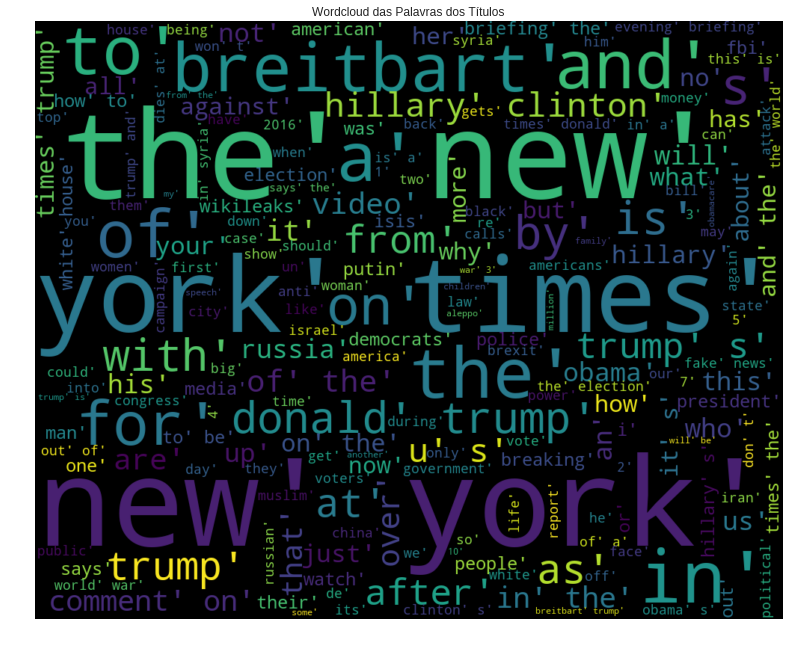

In [126]:
## Carregando a lista de stopwords
stopwords = nltk.corpus.stopwords.words('english')

## words referente a feature title
words = []
for p in train_data['token_title']:
    if p not in stopwords:
        words.append(p)

words = str(words)
            
## parametro do wordcloud
wordcloud = WordCloud(width=1000, height=800, margin=0)
wordcloud.generate(words)
    
## plotagem
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Wordcloud das Palavras dos Títulos')
plt.legend()

<a id='histograma'></a>
### 1.9.2 Histograma

<p>A construção de histogramas tem caráter preliminar em qualquer estudo e é um importante indicador da distribuição de dados. Neste estudo utiliza-se a frequência absoluta, que é o número que representa a quantidade de dados em uma determinada amostra ou o intervalo de classe especifico, indicando a frequência (absoluta) com que uma classe aparece no conjunto de dados.</p>
<p>A seguir, os gráficos abaixo representam os histogramas de Títulos e Textos. Estes gráficos facilitam no entendimento e na analise da existência de influência na avaliação: Confiável ou Não Confiável.</p>



In [127]:
unreliable = train_data[train_data['label'] == 1]
reliable = train_data[train_data['label'] == 0]

labels = ['Não Confiáveis','Confiáveis']
colors = ['#fb7082','#80b1d3']

<a id='histo_titulos'></a>
#### 1.9.2.1 Histograma dos Títulos

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



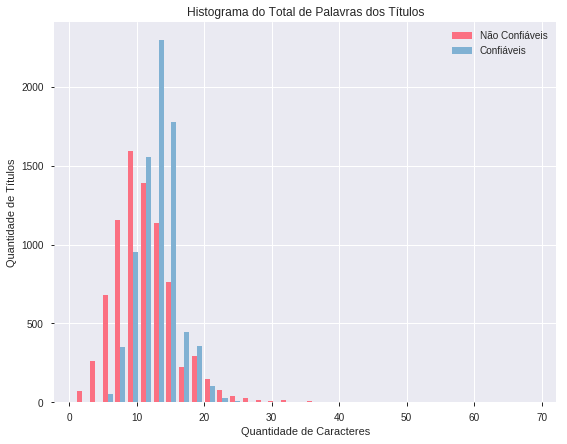

In [128]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.len_token_title,reliable.len_token_title], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Títulos')
plt.title('Histograma do Total de Palavras dos Títulos')
plt.legend()

<a id='histo_textos'></a>
#### 1.9.2.2 Histograma dos Textos

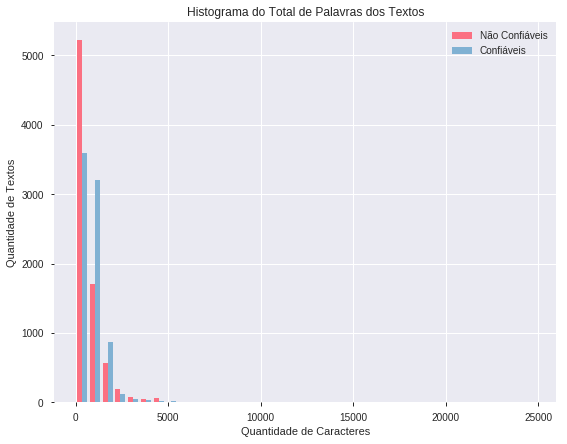

In [129]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.len_token_text,reliable.len_token_text], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Textos')
plt.title('Histograma do Total de Palavras dos Textos')
plt.legend()

<a id='boxplot'></a>
### 1.9.3 Diagrama de Caixa

O diagrama de caixa é construído utilizando as referências de valores mínimos e máximos, primeiro e terceiro quartil, mediana e os outliers da base de dados. Diferentemente do histograma que é melhor para visualização de média e desvio padrão, o diagrama de caixa têm como objetivo estudar as medidas estatística e identificar os valores atípicos dentro do conjunto de dados.

<a id='boxplot_titulo'></a>
#### 1.9.3.1 Diagrama de Caixa dos Títulos

In [130]:
confiavel = go.Box(y=reliable.len_token_title, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.len_token_title, name = 'não confiávels', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa do Total de Palavras dos Títulos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<a id='boxplot_texto'></a>
#### 1.9.3.2 Diagrama de Caixa dos Textos

In [131]:
confiavel = go.Box(y=reliable.len_token_text, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.len_token_text, name = 'não confiávels', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa do Total de Palavras dos Textos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<a id='analise_palavras'></a>
### 1.9.4 Análise por Palavras

Análise de texto não é uma das tarefas mais fácil a se fazer, embora, seja possível por meio de extração de informações por palavras obter uma melhor compreensão da construção de um texto. O objetivo da análise foi identificar o volume de vezes que determinado texto contém: exclamação, questão, simbolo, palavras únicas e suas classes gramaticais como: substantivos, adjetivos e verbos.

<a id='recursos_palavras'></a>
1. #### 1.9.4.1 Recursos por palavras

In [132]:
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
np.random.seed(13)

color = sns.color_palette()
%matplotlib inline

unreliable = train_data[train_data['label'] == 1]
reliable = train_data[train_data['label'] == 0]

In [133]:
print("Geração de recursos baseados nos textos classificados como Confiáveis")
for df in ([reliable]):
    df['comprimento'] = df['title'].apply(lambda x : len(str(x)))
    df['num_exclamação'] = df['title'].apply(lambda comment: str(comment).count('!'))
    df['num_questao'] = df['title'].apply(lambda comment: str(comment).count('?')) 
    df['num_puntuacao'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '.,;:'))                                           
    df['num_simbolo'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '*&$%'))                                           
    df['num_palavras'] = df['title'].apply(lambda comment: len(str(comment).split()))                                         
    df['num_palavras_unicas'] = df['title'].apply(lambda comment: len(set(w for w in str(comment).split())))                                      
    df['palavras_vs_unico'] = df['num_palavras_unicas'] / df['num_palavras']

reliable[reliable.columns[2:]].head(4)

Geração de recursos baseados nos textos classificados como Confiáveis


,author,text,label,title_author_text,token_title,token_author,token_text,token_title_author_text,len_title,len_author,...,len_token_text,len_token_title_author_text,comprimento,num_exclamação,num_questao,num_puntuacao,num_simbolo,num_palavras,num_palavras_unicas,palavras_vs_unico
9777,Bob Price,Despite the loss of state law enforcement gran...,0,Texas Sheriff Releases 39 Criminal Aliens in F...,"[texas, sheriff, releases, 39, criminal, alien...","[bob, price]","[despite, the, loss, of, state, law, enforceme...","[texas, sheriff, releases, 39, criminal, alien...",79,9,...,639,654,79,0,0,0,0,13,13,1.0
17693,Henry Fountain and John Schwartz,"Before he became president, Donald J. Trump ca...",0,Scientists Bristle at Trump Budget’s Cuts to R...,"[scientists, bristle, at, trump, budget, s, cu...","[henry, fountain, and, john, schwartz]","[before, he, became, president, donald, j, tru...","[scientists, bristle, at, trump, budget, s, cu...",74,32,...,939,957,74,0,0,0,0,13,13,1.0
2481,Mark Landler and Jane Perlez,"HANGZHOU, China — President Obama and Presi...",0,Rare Harmony as China and U.S. Commit to Clima...,"[rare, harmony, as, china, and, u, s, commit, ...","[mark, landler, and, jane, perlez]","[hangzhou, china, president, obama, and, presi...","[rare, harmony, as, china, and, u, s, commit, ...",74,28,...,1629,1649,74,0,0,2,0,15,15,1.0
1443,Adelle Nazarian,"WASHINGTON, D. C. — Over 25 Jewish organiza...",0,"Jerusalem Unity Day: Republicans, Democrats Jo...","[jerusalem, unity, day, republicans, democrats...","[adelle, nazarian]","[washington, d, c, over, 25, jewish, organizat...","[jerusalem, unity, day, republicans, democrats...",105,15,...,1178,1194,105,0,0,2,0,14,14,1.0


In [134]:
print("Geração de recursos baseados nos textos classificados como Não Confiáveis")
for df in ([unreliable]):
    df['comprimento'] = df['title'].apply(lambda x : len(str(x)))
    df['num_exclamação'] = df['title'].apply(lambda comment: str(comment).count('!'))
    df['num_questao'] = df['title'].apply(lambda comment: str(comment).count('?')) 
    df['num_puntuacao'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '.,;:'))                                           
    df['num_simbolo'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '*&$%'))                                           
    df['num_palavras'] = df['title'].apply(lambda comment: len(str(comment).split()))                                         
    df['num_palavras_unicas'] = df['title'].apply(lambda comment: len(set(w for w in str(comment).split())))                                      
    df['palavras_vs_unico'] = df['num_palavras_unicas'] / df['num_palavras']

unreliable[unreliable.columns[2:]].head(4)

Geração de recursos baseados nos textos classificados como Não Confiáveis


,author,text,label,title_author_text,token_title,token_author,token_text,token_title_author_text,len_title,len_author,...,len_token_text,len_token_title_author_text,comprimento,num_exclamação,num_questao,num_puntuacao,num_simbolo,num_palavras,num_palavras_unicas,palavras_vs_unico
7091,Kim Smith,"He believed the shelter, which was about 10 fe...",1,"Man’s Driveway Collapses, Reveals Shelter That...","[man, s, driveway, collapses, reveals, shelter...","[kim, smith]","[he, believed, the, shelter, which, was, about...","[man, s, driveway, collapses, reveals, shelter...",77,9,...,214,227,77,0,0,1,0,10,10,1.0
14997,shorty,BY PATRICK MARTIN 5 November 2016 A New York T...,1,US election campaign reveals mass alienation f...,"[us, election, campaign, reveals, mass, aliena...",[shorty],"[by, patrick, martin, 5, november, 2016, a, ne...","[us, election, campaign, reveals, mass, aliena...",66,6,...,1558,1569,66,0,0,0,0,9,9,1.0
519,Pakalert,source Add To The Conversation Using Facebook ...,1,US NATO To Attack Putin Military Drills in Rus...,"[us, nato, to, attack, putin, military, drills...",[pakalert],"[source, add, to, the, conversation, using, fa...","[us, nato, to, attack, putin, military, drills...",79,8,...,8,24,79,0,0,0,0,16,16,1.0
19434,Debbie Menon,Professor and Attorney Rahul Manchanda worke...,1,Comment on Federal Election Commission (“FEC”)...,"[comment, on, federal, election, commission, f...","[debbie, menon]","[professor, and, attorney, rahul, manchanda, w...","[comment, on, federal, election, commission, f...",106,12,...,2093,2112,106,0,0,0,0,17,17,1.0


<a id='classe_gramatical'></a>
#### 1.9.4.2 Classe Gramatical

In [135]:
## Função retornar a POS TAG
def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return[noun_count, adjective_count, verb_count]

In [136]:
print("Gerando POS TAG dos textos classificados como Não Confiáveis")
for df in ([reliable]):
    df['substantivos'], df['adjetivos'], df['verbos'] = zip(*df['title'].apply(lambda comment: tag_part_of_speech(str(comment))))
    df['substantivos_vs_comprimento'] = df['substantivos'] / df['comprimento']
    df['adjetivos_vs_comprimento'] = df['adjetivos'] / df['comprimento']
    df['verbos_vs_comprimento'] = df['verbos'] /df['comprimento']
    df['substantivos_vs_palavras'] = df['substantivos'] / df['num_palavras']
    df['adjetivos_vs_palavras'] = df['adjetivos'] / df['num_palavras']
    df['verbos_vs_palavras'] = df['verbos'] / df['num_palavras']
    
    # Mais recursos úteis
    df["countagem_palavras_title"] = df["author"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    df["media_palavras_len"] = df["author"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['por_cento']= df['num_puntuacao']*100/df['num_palavras']
    
reliable[['substantivos','substantivos_vs_comprimento','adjetivos_vs_comprimento','verbos_vs_comprimento','substantivos_vs_palavras','adjetivos_vs_palavras','verbos_vs_palavras']].head(8)

Gerando POS TAG dos textos classificados como Não Confiáveis


,substantivos,substantivos_vs_comprimento,adjetivos_vs_comprimento,verbos_vs_comprimento,substantivos_vs_palavras,adjetivos_vs_palavras,verbos_vs_palavras
9777,7,0.088608,0.012658,0.012658,0.538462,0.076923,0.076923
17693,8,0.108108,0.000000,0.013514,0.615385,0.000000,0.076923
2481,8,0.108108,0.013514,0.013514,0.533333,0.066667,0.066667
1443,12,0.114286,0.000000,0.000000,0.857143,0.000000,0.000000
2686,7,0.093333,0.000000,0.026667,0.466667,0.000000,0.133333
7802,7,0.112903,0.000000,0.000000,0.583333,0.000000,0.000000
8174,9,0.126761,0.014085,0.000000,0.692308,0.076923,0.000000
19943,9,0.125000,0.000000,0.013889,0.642857,0.000000,0.071429


In [137]:
print("Gerando POS TAG dos textos classificados como Não Confiáveis")
for df in ([unreliable]):
    df['substantivos'], df['adjetivos'], df['verbos'] = zip(*df['title'].apply(lambda comment: tag_part_of_speech(str(comment))))
    df['substantivos_vs_comprimento'] = df['substantivos'] / df['comprimento']
    df['adjetivos_vs_comprimento'] = df['adjetivos'] / df['comprimento']
    df['verbos_vs_comprimento'] = df['verbos'] /df['comprimento']
    df['substantivos_vs_palavras'] = df['substantivos'] / df['num_palavras']
    df['adjetivos_vs_palavras'] = df['adjetivos'] / df['num_palavras']
    df['verbos_vs_palavras'] = df['verbos'] / df['num_palavras']
    
    # Mais recursos úteis
    df["countagem_palavras_title"] = df["author"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    df["media_palavras_len"] = df["author"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['por_cento']= df['num_puntuacao']*100/df['num_palavras']
    
unreliable[['substantivos','substantivos_vs_comprimento','adjetivos_vs_comprimento','verbos_vs_comprimento','substantivos_vs_palavras','adjetivos_vs_palavras','verbos_vs_palavras']].head(8)

Gerando POS TAG dos textos classificados como Não Confiáveis


,substantivos,substantivos_vs_comprimento,adjetivos_vs_comprimento,verbos_vs_comprimento,substantivos_vs_palavras,adjetivos_vs_palavras,verbos_vs_palavras
7091,9,0.116883,0.000000,0.000000,0.900000,0.000000,0.000000
14997,5,0.075758,0.030303,0.015152,0.555556,0.222222,0.111111
519,13,0.164557,0.000000,0.000000,0.812500,0.000000,0.000000
19434,11,0.103774,0.000000,0.009434,0.647059,0.000000,0.058824
16703,8,0.114286,0.000000,0.028571,0.666667,0.000000,0.166667
853,7,0.122807,0.000000,0.000000,0.636364,0.000000,0.000000
16730,4,0.050000,0.012500,0.012500,0.307692,0.076923,0.076923
4448,8,0.101266,0.000000,0.025316,0.615385,0.000000,0.153846


<a id='matriz_correlacao'></a>
### 1.9.5 Matriz de correlação

Com as variaveis extraidas por meio da análise por palavra, se tornou possível criar relacionamentos e identicar quais desses relacionamento se correlacionam entre si.

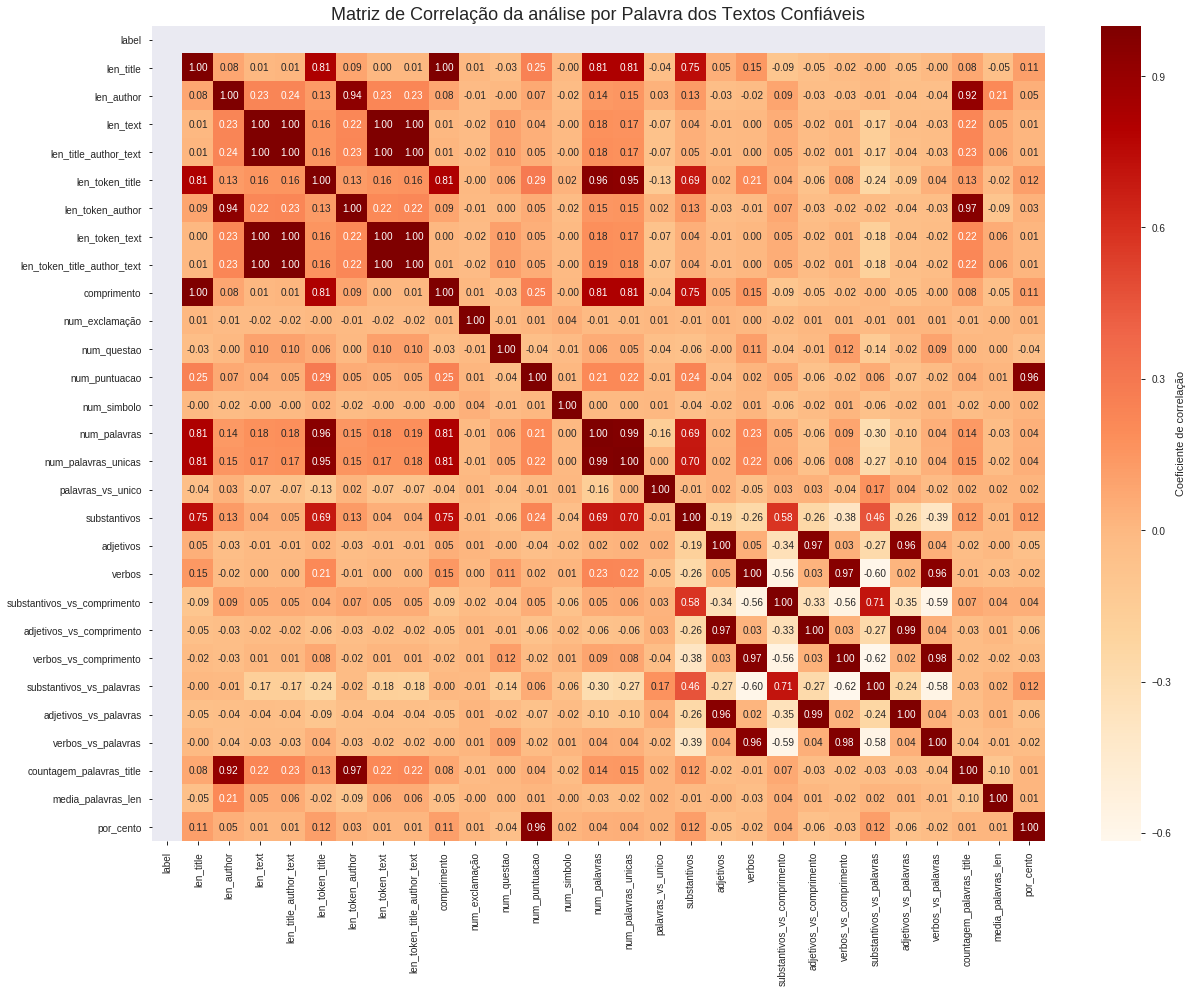

In [138]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(reliable.drop(['id','title'], axis=1).corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Coeficiente de correlação'}, cmap='OrRd')
ax.set_title("Matriz de Correlação da análise por Palavra dos Textos Confiáveis", fontsize=18)
plt.show()

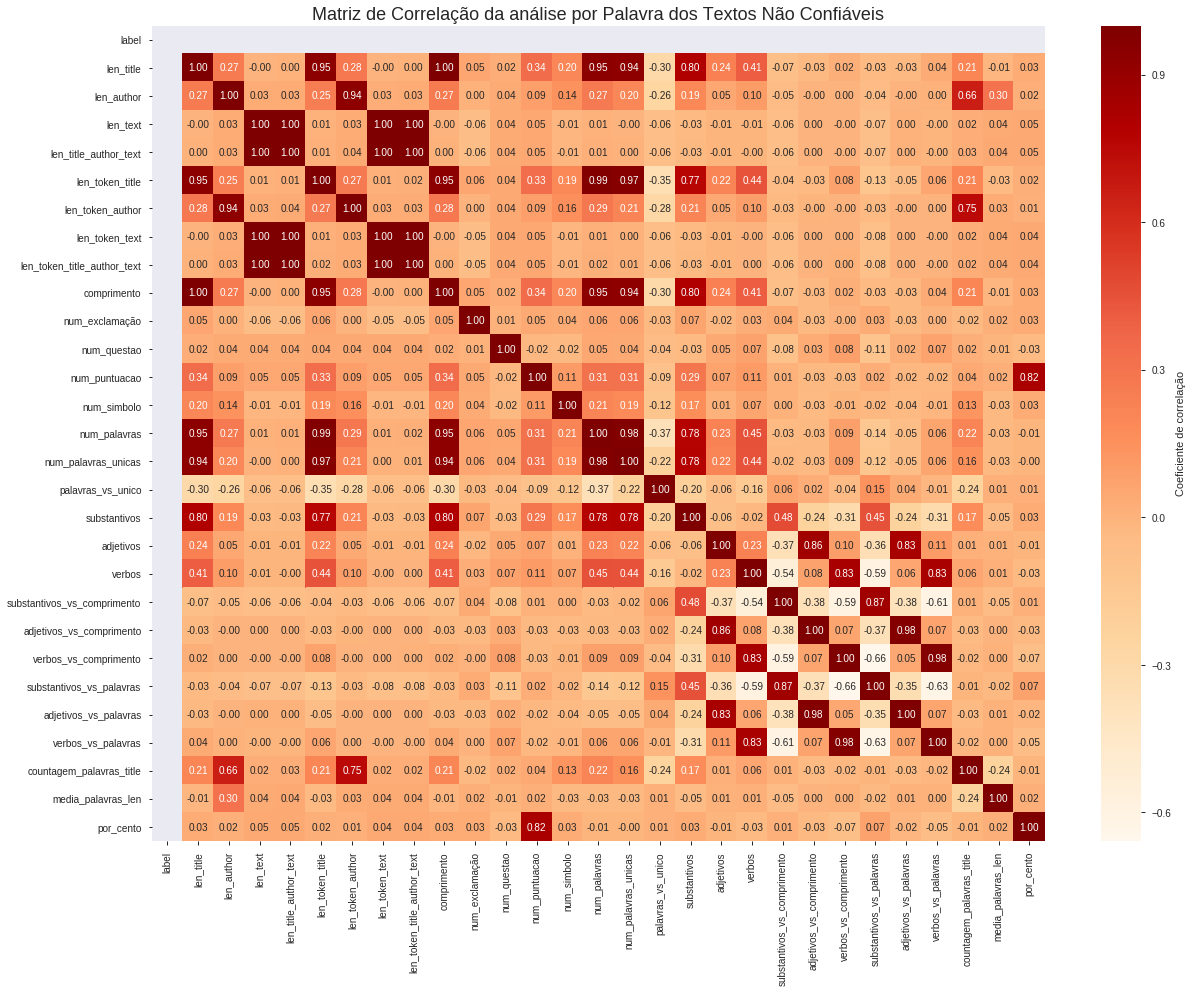

In [139]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(unreliable.drop(['id','title'], axis=1).corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Coeficiente de correlação'}, cmap='OrRd')
ax.set_title("Matriz de Correlação da análise por Palavra dos Textos Não Confiáveis", fontsize=18)
plt.show()

<a id='export_csv'></a>
# 2. Exportando Dataframe Refatorado CSV:

A sáida de todo o tratamento dos dados será utilizada na próxima etapa que será o desenvolvimento de um aprendizado de máquina com deep leraning. 

In [140]:
train_data.to_csv ('train_refatorado.csv', index = None, header=True)

# Referências

https://www.kaggle.com/shaz13/feature-engineering-for-nlp-classification/notebook#Tagging-Parts-Of-Speech-And-More-Feature-Engineering..